# Pset 4: PageRank

Objective: to write an AI to rank web pages by importance.

# Background
<p align="justify">
When search engines like Google display search results, they do so by placing more “important” and higher-quality pages higher in the search results than less important pages. But how does the search engine know which pages are more important than other pages?
<p align="justify">
One heuristic might be that an “important” page is one that many other pages link to, since it’s reasonable to imagine that more sites will link to a higher-quality webpage than a lower-quality webpage. We could therefore imagine a system where each page is given a rank according to the number of incoming links it has from other pages, and higher ranks would signal higher importance.
<p align="justify">
But this definition isn’t perfect: if someone wants to make their page seem more important, then under this system, they could simply create many other pages that link to their desired page to artificially inflate its rank.
<p align="justify">
For that reason, the PageRank algorithm was created by Google’s co-founders (including Larry Page, for whom the algorithm was named). In PageRank’s algorithm, a website is more important if it is linked to by other important websites, and links from less important websites have their links weighted less. This definition seems a bit circular, but it turns out that there are multiple strategies for calculating these rankings.


# Random Surfer Model
<p align="justify">
One way to think about PageRank is with the random surfer model, which considers the behavior of a hypothetical surfer on the internet who clicks on links at random. Consider the corpus of web pages below, where an arrow between two pages indicates a link from one page to another.

**Figure 1**

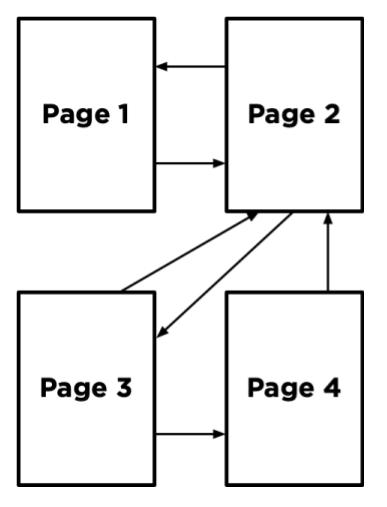

<p align="justify">
The random surfer model imagines a surfer who starts with a web page at random, and then randomly chooses links to follow. If the surfer is on Page 2, for example, they would randomly choose between Page 1 and Page 3 to visit next (duplicate links on the same page are treated as a single link, and links from a page to itself are ignored as well). If they chose Page 3, the surfer would then randomly choose between Page 2 and Page 4 to visit next.
<p align="justify">
A page’s PageRank, then, can be described as the probability that a random surfer is on that page at any given time. After all, if there are more links to a particular page, then it’s more likely that a random surfer will end up on that page. Moreover, a link from a more important site is more likely to be clicked on than a link from a less important site that fewer pages link to, so this model handles weighting links by their importance as well.
<p align="justify">
One way to interpret this model is as a **Markov Chain**, where each page represents a state, and each page has a **transition model** that chooses among its links at random. At each time step, the state switches to one of the pages linked to by the current state.
<p align="justify">
By sampling states randomly from the Markov Chain, we can get an estimate for each page’s PageRank. We can start by choosing a page at random, then keep following links at random, keeping track of how many times we’ve visited each page. After we’ve gathered all of our samples (based on a number we choose in advance), the proportion of the time we were on each page might be an estimate for that page’s rank.
<p align="justify">
However, this definition of PageRank proves slightly problematic, if we consider a network of pages like the below.


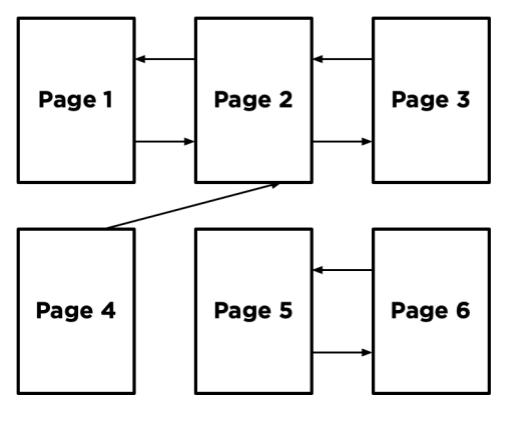

<p align="justify">
Imagine we randomly started by sampling Page 5. We’d then have no choice but to go to Page 6, and then no choice but to go to Page 5 after that, and then Page 6 again, and so forth. We’d end up with an estimate of 0.5 for the PageRank for Pages 5 and 6, and an estimate of 0 for the PageRank of all the remaining pages, since we spent all our time on Pages 5 and 6 and never visited any of the other pages.
<p align="justify">
To ensure we can always get to somewhere else in the corpus of web pages, we’ll introduce to our model a damping factor $d$. With probability $d$ (where $d$ is usually set around $0.85$), the random surfer will choose from one of the links on the current page at random. But otherwise (with probability $1 - d$), the random surfer chooses one out of all of the pages in the corpus at random (including the one they are currently on).
<p align="justify">
Our random surfer now starts by choosing a page at random, and then, for each additional sample we’d like to generate, chooses a link from the current page at random with probability $d$, and chooses any page at random with probability $1 - d$. If we keep track of how many times each page has shown up as a sample, we can treat the proportion of states that were on a given page as its PageRank.

# Iterative Algorithm

<p align='justify'>
We can also define a page’s PageRank using a recursive mathematical expression. Let $PR(p)$ be the PageRank of a given page $p$: the probability that a random surfer ends up on that page. How do we define $PR(p)$? Well, we know there are two ways that a random surfer could end up on the page:

1. With probability $1 - d$, the surfer chose a page at random and ended up on page $p$.
2. With probability $d$, the surfer followed a link from a page $i$ to page $p$.

<p align='justify'>
The first condition is fairly straightforward to express mathematically: it’s $1 - d$ divided by $N$, where $N$ is the total number of pages across the entire corpus. This is because the $1 - d$ probability of choosing a page at random is split evenly among all $N$ possible pages.

<p align='justify'>
For the second condition, we need to consider each possible page $i$ that links to page $p$. For each of those incoming pages, let $NumLinks(i)$ be the number of links on page $i$. Each page $i$ that links to $p$ has its own PageRank, $PR(i)$, representing the probability that we are on page $i$ at any given time. And since from page $i$ we travel to any of that page’s links with equal probability, we divide $PR(i)$ by the number of links $NumLinks(i)$ to get the probability that we were on page $i$ and chose the link to page $p$.

<p align='justify'>
This gives us the following definition for the PageRank for a page $p$.

<p align='center'>
$PR(p) = \frac{1 - d}{N} + d\sum_{i} \frac{PR(i)}{NumLinks(i)}$

<p align='justify'>
In this formula, $d$ is the damping factor, $N$ is the total number of pages in the corpus, $i$ ranges over all pages that link to page $p$, and $NumLinks(i)$ is the number of links present on page $i$.

<p align='justify'>
How would we go about calculating PageRank values for each page, then? We can do so via <b>iteration</b>: start by assuming the PageRank of every page is $1 / N$ (i.e., equally likely to be on any page). Then, use the above formula to calculate new PageRank values for each page, based on the previous PageRank values. If we keep repeating this process, calculating a new set of PageRank values for each page based on the previous set of PageRank values, eventually the PageRank values will converge (i.e., not change by more than a small threshold with each iteration).

In this pset, you’ll implement both such approaches for calculating PageRank – calculating both by:

1. Sampling pages from a Markov Chain random surfer, and
2. By iteratively applying the PageRank formula.

# Corpus of web pages
<p align='justify'>
We will use a dictionary to represent a corpus of web pages. The keys in the dictionary represent the pages and the values are a set of all the pages linked to by the key. For example, if the corpus of web pages we want to represent is that shown in Figure 1, the dictionary would be as follows:

```
corpus_fig_1 = {"Page 1": {"Page 2"}, "Page 2": {"Page 1", "Page 3"}, "Page 3": {"Page 2", "Page 4"}, "Page 4": {"Page 2"}}
```

The keys and values of such a dictionary could be gathered, for instance, using a crawler.

# Implementations

In [ ]:
## Testing ##
# First install the dependencies
%pip install -i https://test.pypi.org/simple/ fee232==0.1.7
from pagerank.pagerank import *

## Transition Model
<p align='justify'>
The <b>transition_model</b> should return a dictionary representing the probability distribution over which page a random surfer would visit next, given a corpus of pages, a current page, and a damping factor.
The function accepts three arguments: corpus, page, and damping_factor.

- The corpus is a Python dictionary mapping a page name to a set of all pages linked to by that page.
- The page is a string representing which page the random surfer is currently on.
- The damping_factor is a floating point number representing the damping factor to be used when generating the probabilities.

<p align='justify'>
The return value of the function should be a Python dictionary with one key for each page in the corpus. Each key should be mapped to a value representing the probability that a random surfer would choose that page next. The values in this returned probability distribution should sum to 1.

With probability `damping_factor`, the random surfer should randomly choose one of the links from page with equal probability. With probability `1 - damping_factor`, the random surfer should randomly choose one of all pages in the corpus with equal probability.

For example, if the corpus is `corpus_fig_1`, the page is `Page 2`, and the `damping_factor` is $0.85$, then the output of transition_model should be `{"Page 1": 0.4625, "Page 2": 0.0375, "Page 3": 0.4625, "Page 4": 0.0375}`. This is because with probability $0.85$, we choose randomly to go from `Page 2` to either `Page 1` or `Page 3` (so each of `Page 1` or `Page 3` has probability $0.425$ to start), but every page gets an additional $0.05$ because with probability $0.15$ we choose randomly among all three of the pages.

<p align='justify'>
If page has no outgoing links, then transition_model should return a probability distribution that chooses randomly among all pages with equal probability. (In other words, if a page has no links, we can pretend it has links to all pages in the corpus, including itself.)

In [ ]:
import os
import random

DAMPING = 0.85
SAMPLES = 10000

def transition_model(corpus, page, damping_factor):
    """
    Return a probability distribution over which page to visit next,
    given a current page.
    
    With probability `damping_factor`, choose a link at random
    linked to by `page`. With probability `1 - damping_factor`, choose
    a link at random chosen from all pages in the corpus.
    """
    distr = {}
    if len(corpus) == 0:
        return distr
    
    if len(corpus[page]) > 0:
        initial = round((1 - damping_factor) / len(corpus), 4)
        extra = damping_factor / len(corpus[page])
    else:
        initial = round(1 / len(corpus), 4)
    
    for key in corpus:
        if key in corpus[page]:
            distr[key] = round(initial + extra, 4)
        else:
            distr[key] = initial
    
    return distr

In [ ]:
# Create the corpus
corpus_fig_1 = {"Page 1": {"Page 2"}, "Page 2": {"Page 1", "Page 3"}, "Page 3": {"Page 2", "Page 4"}, "Page 4": {"Page 2"}}

# Test the transition_model function
next_page = transition_model(corpus_fig_1, 'Page 2', DAMPING)
print(next_page)

In [ ]:
## Testing ##

# 0. Testing the transition_model function using example given in the specification of the problem
test_0(transition_model)

# 1. Testing the transition_model function using a different example
test_1(transition_model)

## PageRank by sampling

The `sample_pagerank` function should accept a corpus of web pages, a damping factor, and a number of samples, and return an estimated PageRank for each page.

The function accepts three arguments: `corpus`, `a damping_factor`, and `n`.
- The `corpus` is a Python dictionary mapping a page name to a set of all pages linked to by that page.
- The `damping_factor` is a floating point number representing the damping factor to be used by the transition model.
- `n` is an integer representing the number of samples that should be generated to estimate PageRank values.

<p align='justify'>
The return value of the function should be a Python dictionary with one key for each page in the corpus. Each key should be mapped to a value representing that page’s estimated PageRank (i.e., the proportion of all the samples that corresponded to that page). The values in this dictionary should sum to 1.

The first sample should be generated by choosing from a page at random.

For each of the remaining samples, the next sample should be generated from the previous sample based on the previous sample’s transition model.
- The previous sample can be passed into the `transition_model` function, along with the `corpus` and the `damping_factor`, to get the probabilities for the next sample.
- For example, if the transition probabilities are `{"Page 1": 0.4625, "Page 2": 0.0375, "Page 3": 0.4625, "Page 4": 0.0375}`, then 46.25% of the time the next sample generated should be `Page 1`, 3.75% of the time the next sample generated should be `Page 2`, 46.25% of the time the next sampel generated should be `Page 3` and 3.75% of the time the next sample generated should be `Page 4`.

You may assume that n will be at least 1.

In [ ]:
def sample_pagerank(corpus, damping_factor, n):
    """
    Return PageRank values for each page by sampling `n` pages
    according to transition model, starting with a page at random.
    
    Return a dictionary where keys are page names, and values are
    their estimated PageRank value (a value between 0 and 1). All
    PageRank values should sum to 1.
    """
    page_rank = {}
    if len(corpus) == 0:
        return page_rank
    
    start = random.choice(list(corpus.keys()))
    
    for _ in range(n):
        select = transition_model(corpus, start, damping_factor)
        start = random.choices(list(select.keys()), weights=list(select.values()), k=1)[0]
        
        if start in page_rank:
            page_rank[start] += 1 / n
        else:
            page_rank[start] = 1 / n
    
    return page_rank

In [ ]:
# Print out the ranks of pages as per the sample_pagerank function

ranks = sample_pagerank(corpus_fig_1, DAMPING, SAMPLES)

print(f"PageRank Results from Sampling (n = {SAMPLES})")
for page in sorted(ranks):
    print(f"  {page}: {ranks[page]:.4f}")

In [ ]:
## Testing ##

# 2. Testing sample_pagerank function
test_2(sample_pagerank)

## PageRank by iteration

The `iterate_pagerank` function should accept a corpus of web pages and a damping factor, calculate PageRanks based on the iteration formula described above, and return each page’s PageRank accurate to within $0.001$.

The function accepts two arguments: corpus and damping_factor.
- The corpus is a Python dictionary mapping a page name to a set of all pages linked to by that page.
- The `damping_factor` is a floating point number representing the damping factor to be used in the PageRank formula.

The return value of the function should be a Python dictionary with one key for each page in the corpus. Each key should be mapped to a value representing that page’s PageRank. The values in this dictionary should sum to 1.

The function should begin by assigning each page a rank of $1 / N$, where $N$ is the total number of pages in the corpus.

The function should then repeatedly calculate new rank values based on all of the current rank values, according to the PageRank formula in the “Background” section. (i.e., calculating a page’s PageRank based on the PageRanks of all pages that link to it).

A page that has no links at all should be interpreted as having one link for every page in the corpus (including itself).

This process should repeat until no PageRank value changes by more than 0.001 between the current rank values and the new rank values.

**NB: the output of `sample_pagerank` and `iterate_pagerank` should have similar output if given the same corpus.** 

In [ ]:
def iterate_pagerank(corpus, damping_factor):
    """
    Return PageRank values for each page by iteratively updating
    PageRank values until convergence.
    
    Return a dictionary where keys are page names, and values are
    their estimated PageRank value (a value between 0 and 1). All
    PageRank values should sum to 1.
    """
    page_rank = {}
    if len(corpus) == 0:
        return page_rank
    
    page_rank[next(iter(corpus))], before = 1 / len(corpus), 10
    
    while abs(page_rank[next(iter(corpus))] - before) > 0.0001:
        before = page_rank[next(iter(corpus))]
        
        for key in corpus:
            sumation = 0
            
            for page in corpus:
                p_rank_i = page_rank[page] if page in page_rank else 1 / len(corpus)
                
                if len(corpus[page]) == 0:
                    sumation += p_rank_i / len(corpus)
                if key in corpus[page]:
                    sumation += p_rank_i / len(corpus[page])
            
            page_rank[key] = (1 - damping_factor) / len(corpus) + damping_factor * sumation
    
    return page_rank

In [ ]:
# Print out the ranks of pages as per the iterate_pagerank function

ranks = iterate_pagerank(corpus_fig_1, DAMPING)

print(f"PageRank Results from iteration")
for page in sorted(ranks):
    print(f"  {page}: {ranks[page]:.4f}")

In [ ]:
## Testing ##

# 3. Testing iterate_pagerank function
test_3(iterate_pagerank)

# Submission
- Be sure to remove all the `raise NotImplementedError` lines in all the cells above.
- Run all the tests and ensure that there is no error.
- Download your `pset4.ipynb` file and submit it through SOMAS under the Assignment labeled pset4, under Wk 8.